## 😷 Mask Image Classification

Given *images of people with and without masks*, let's try to classifiy if there is a **mask** in a given image.

We will use a Tensorflow/Keras CNN to make our predictions. 

Data source: https://www.kaggle.com/datasets/niharika41298/withwithout-mask

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

2025-04-02 08:44:18.618137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = 'archive/maskdata/maskdata/train'
test_dir = 'archive/maskdata/maskdata/test'

### Load Images

In [3]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [4]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

val_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False
)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


### Training

In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [15]:
x

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [16]:
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [17]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 64)               0     

In [19]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [20]:
history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


2025-04-02 09:56:07.808186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/16 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5456  

2025-04-02 09:56:37.116410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/16 [==============================] - 31s 2s/step - loss: 0.6867 - accuracy: 0.5456 - val_loss: 0.6801 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 26s 2s/step - loss: 0.6821 - accuracy: 0.5538 - val_loss: 0.6801 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 27s 2s/step - loss: 0.6821 - accuracy: 0.5396 - val_loss: 0.6721 - val_accuracy: 0.5691
Epoch 4/100
16/16 [==============================] - 26s 2s/step - loss: 0.6871 - accuracy: 0.5558 - val_loss: 0.6773 - val_accuracy: 0.5610
Epoch 5/100
16/16 [==============================] - 26s 2s/step - loss: 0.6762 - accuracy: 0.5619 - val_loss: 0.6727 - val_accuracy: 0.5691
Epoch 6/100
16/16 [==============================] - 26s 2s/step - loss: 0.6694 - accuracy: 0.5842 - val_loss: 0.6658 - val_accuracy: 0.6423
Epoch 7/100
16/16 [==============================] - 26s 2s/step - loss: 0.6758 - accuracy: 0.5943 - val_loss: 0.6678 - val_accuracy: 0.5691
Epoch 8/100
16/16 [======

In [23]:
results= model.evaluate(test_images, verbose=0)
print("Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.2f}%".format(results[1]*100))

2025-04-02 10:18:11.656044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Loss: 0.60589
Accuracy: 68.69%


### Visualize Results

In [25]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 42
)

Found 198 images belonging to 2 classes.


In [27]:
samples = sample_images.next()
samples

(array([[[[0.2392157 , 0.2901961 , 0.32156864],
          [0.2392157 , 0.2901961 , 0.32156864],
          [0.24313727, 0.29411766, 0.3254902 ],
          ...,
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393]],
 
         [[0.2392157 , 0.2901961 , 0.32156864],
          [0.24313727, 0.29411766, 0.3254902 ],
          [0.24705884, 0.29803923, 0.32941177],
          ...,
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393]],
 
         [[0.24313727, 0.29411766, 0.3254902 ],
          [0.24313727, 0.29411766, 0.3254902 ],
          [0.24705884, 0.29803923, 0.32941177],
          ...,
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393],
          [0.2509804 , 0.2784314 , 0.30980393]],
 
         ...,
 
         [[0.32156864, 0.3372549 , 0.3803922 ],
          [0.26666

In [36]:
predictions = np.squeeze((model.predict(samples[0]) >= 0.5).astype(int))
predictions

1/1 [==============================] - 0s 435ms/step


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [37]:
labels = samples[1].astype(int)
labels

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
test_images.class_indices

{'with_mask': 0, 'without_mask': 1}

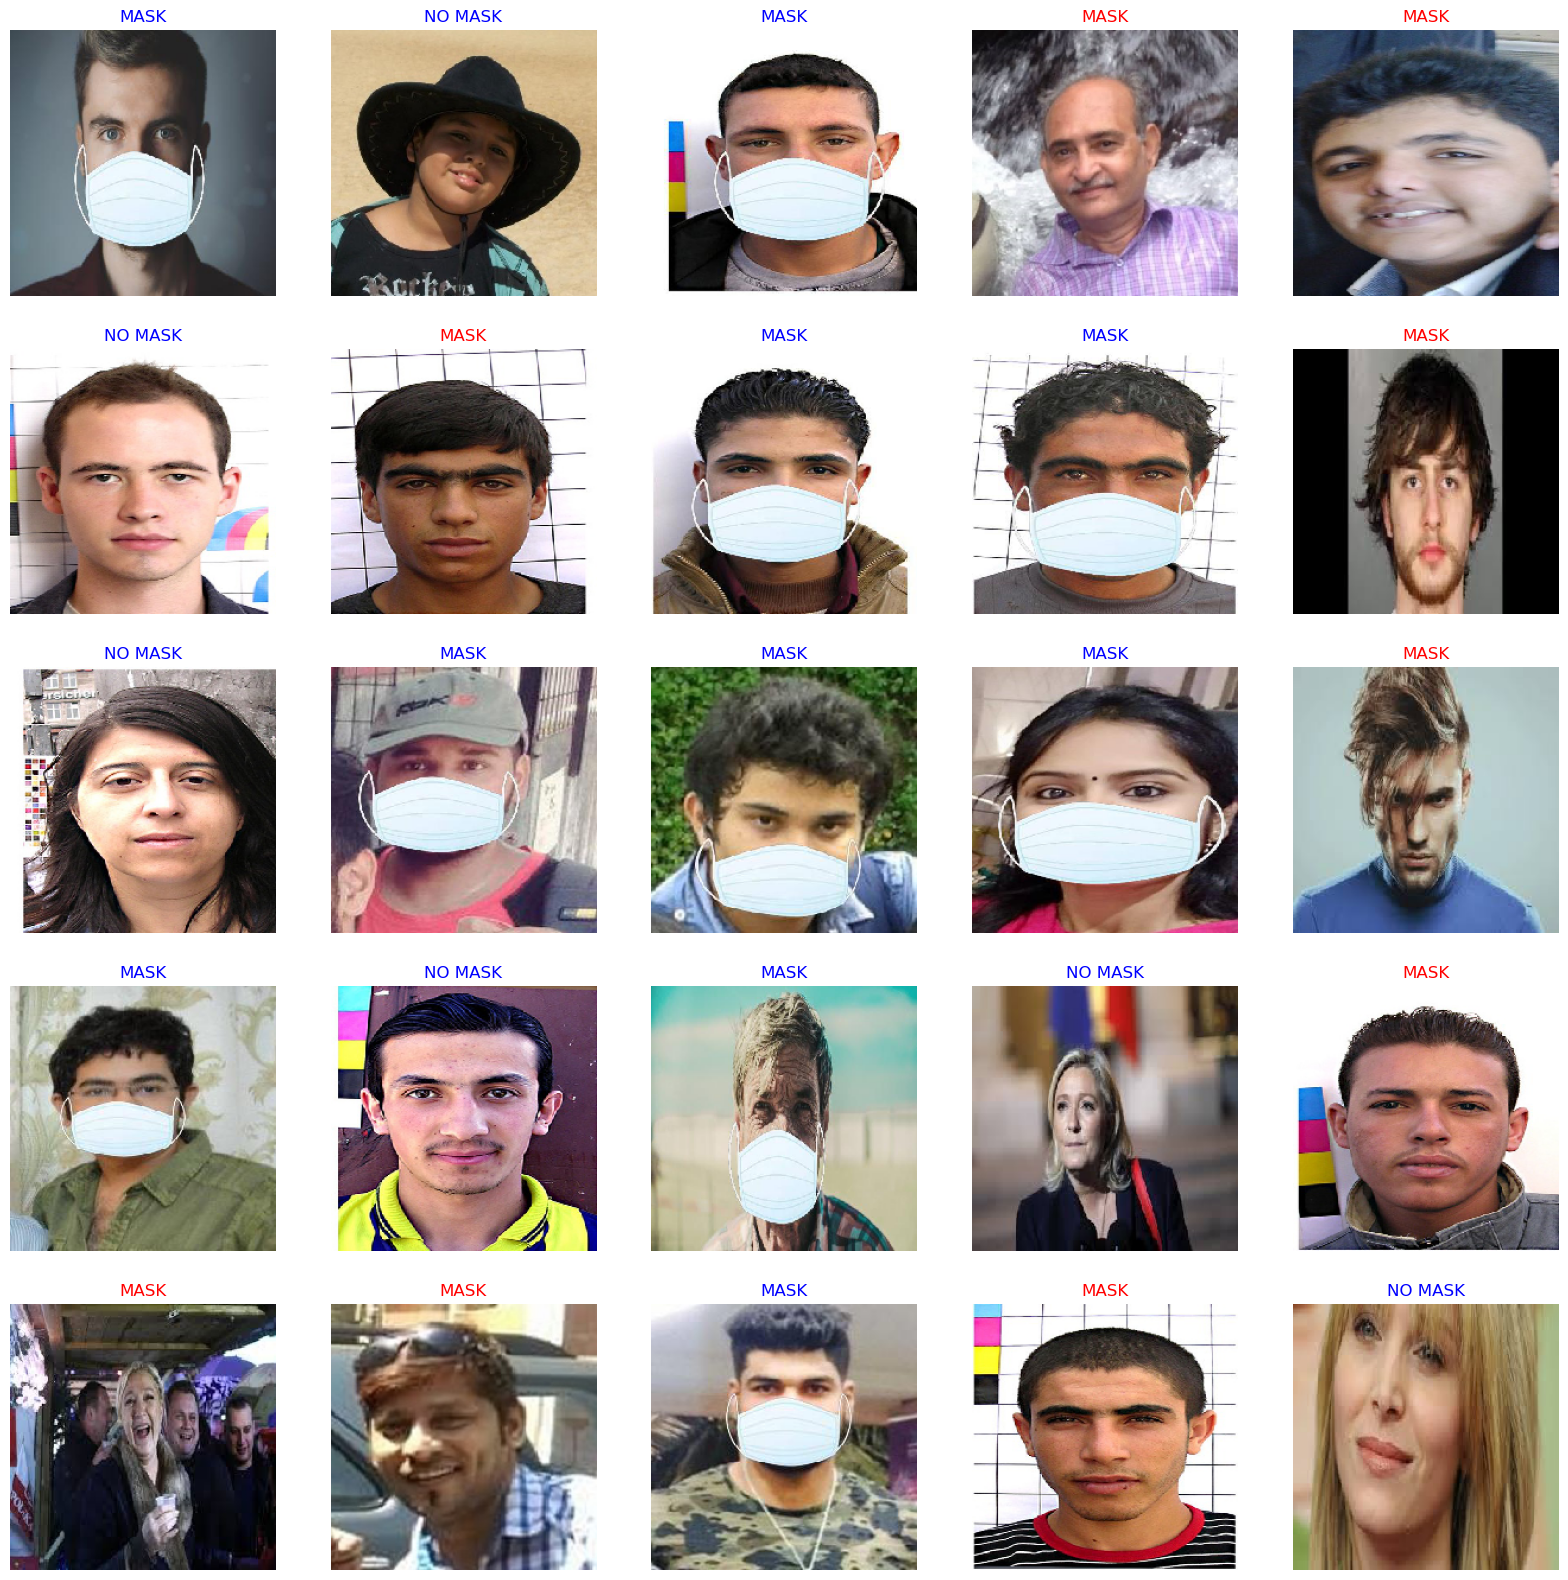

In [41]:
plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(('NO MASK' if predictions[i] == 1 else 'MASK'), color=('blue' if labels[i] == predictions[i] else 'red'))

plt.show()